In [3]:
import satellite_images_nso.api.nso_georegion as nso
from settings import nso_username, nso_password, path_geojson,  output_path
# Optional
from settings import height_band_filepath, cloud_detection_model_path, links_must_contain

# Search for satellite images in geojson and download links

In [4]:
# Make a georegion object
georegion = nso.nso_georegion(
    path_to_geojson=path_geojson, 
    output_folder=output_path,
    username=nso_username,
    password=nso_password,
    )

Multipolygon detected!
Buffering to grow the different multipolygons together in one polygon for retrieving links


In [5]:
# This methods finds all download links of satellite images which overlap for 50% or more with region in the geojson, starting from date 2022-01-01
links = georegion.retrieve_download_links(max_diff=0.5, start_date="2019-01-01")

Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.5
[[ 3.84979119  3.84978993  3.84978876 ...  3.84979391  3.84979235
   3.84979119]
 [51.79824571 51.79824819 51.7982505  ... 51.7982404  51.79824345
  51.79824571]]
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.5
[[ 3.84979119  3.84978993  3.84978876 ...  3.84979391  3.84979235
   3.84979119]
 [51.79824571 51.79824819 51.7982505  ... 51.7982404  51.79824345
  51.79824571]]
Cloudcover check:
Cloudcover check:
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.5
[[ 3.84979119  3.84978993  3.84978876 ...  3.84979391  3.84979235
   3.84979119]
 [51.79824571 51.79824819 51.7982505  ... 51.7982404  51.79824345
  51.79824571]]
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.5
[[ 3.84979119  3.84978993  3.84978876 ...  3.84979391  3.84979235
   3.84979119]
 [51.79824571 51.79824819 51.7982505  ... 51.7982404  

# PNEO data

In [6]:
# Example filter on resolution and bands
pneo_links = links[links['resolution'] == "30cm"]
pneo_links = pneo_links[pneo_links["link"].str.contains("RGBNED")]
pneo_links = pneo_links.sort_values("percentage_geojson")

In [12]:
for index,value in pneo_links.iterrows():

    
    georegion.execute_link(value["link"], plot=False)

Searching for: E:/data/duinen_goeree_kwade_hoek\20231017_110029_PNEO-03_1_1**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20231017_110029_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20231017_110029_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20231017_110029_PNEO-03_1_1**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20231017_110029_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20231017_110029_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20230918_105252_PNEO-04_1_1**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_ho

# Superview data

In [13]:
# Example filter on resolution and bands
superview_links = links[links['resolution'] == "50cm"]
superview_links = superview_links[superview_links["link"].str.contains("RGBI")]
superview_links = superview_links.sort_values("percentage_geojson")

In [14]:
#Returns a pandas dataframe columns with: 1.The Download Link. 2.Percentage of satellite area which covers the selected submitted georegion 3.The polygon of what is missing compared with the submitted georegion. 4.The satellite images that cover the submitted georegion
# 5. The date when the satellite image was taken. 6. The satellite constellation. 7. The resolution of the satellite image
superview_links

,link,percentage_geojson,missing_polygon,covered_polygon,date,satellite,resolution
156,https://api.satellietdataportaal.nl/v1/downloa...,0.505347,MULTIPOLYGON (((3.849789931277587 51.798248192...,"POLYGON ((3.84877889753519 51.810535686196616,...",20210121,SV1-02,50cm
151,https://api.satellietdataportaal.nl/v1/downloa...,0.505347,MULTIPOLYGON (((3.849789931277587 51.798248192...,"POLYGON ((3.84877889753519 51.810535686196616,...",20210121,SV1-02,50cm
71,https://api.satellietdataportaal.nl/v1/downloa...,0.548962,MULTIPOLYGON (((3.849789931277587 51.798248192...,POLYGON ((3.8476794177583784 51.80591001241232...,20220812,SV1-03,50cm
76,https://api.satellietdataportaal.nl/v1/downloa...,0.548962,MULTIPOLYGON (((3.849789931277587 51.798248192...,POLYGON ((3.8476794177583784 51.80591001241232...,20220812,SV1-03,50cm
211,https://api.satellietdataportaal.nl/v1/downloa...,0.572686,MULTIPOLYGON (((3.849789931277587 51.798248192...,"POLYGON ((3.848969821153126 51.8001384296642, ...",20220317,SV1-03,50cm
216,https://api.satellietdataportaal.nl/v1/downloa...,0.572686,MULTIPOLYGON (((3.849789931277587 51.798248192...,"POLYGON ((3.848969821153126 51.8001384296642, ...",20220317,SV1-03,50cm
166,https://api.satellietdataportaal.nl/v1/downloa...,0.576359,MULTIPOLYGON (((3.961424149029564 51.846478379...,"POLYGON ((3.849789931277587 51.7982481927315, ...",20200501,SV1-04,50cm
161,https://api.satellietdataportaal.nl/v1/downloa...,0.576359,MULTIPOLYGON (((3.961424149029564 51.846478379...,"POLYGON ((3.849789931277587 51.7982481927315, ...",20200501,SV1-04,50cm
126,https://api.satellietdataportaal.nl/v1/downloa...,0.610481,MULTIPOLYGON (((3.849789931277587 51.798248192...,"POLYGON ((3.8497010542912933 51.7984290647158,...",20190908,SV1-03,50cm
121,https://api.satellietdataportaal.nl/v1/downloa...,0.610481,MULTIPOLYGON (((3.849789931277587 51.798248192...,"POLYGON ((3.8497010542912933 51.7984290647158,...",20190908,SV1-03,50cm


Searching for: E:/data/duinen_goeree_kwade_hoek\20210121_114229_SV1-02**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Starting download to: E:/data/duinen_goeree_kwade_hoek/20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm.zip
Extracting files
Extracted folder is: E:/data/duinen_goeree_kwade_hoek/20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm
cropping file E:/data/duinen_goeree_kwade_hoek/20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm\20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
New cropped filename: E:/data/duinen_goeree_kwade_hoek/20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm\20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Cropping multipolygons
raster path opened
Assuming Superview Satellite columns
convert to RD
Plotting data for:E:/data/duinen_goeree_kwade_hoek/20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm\20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif-------------------------------------

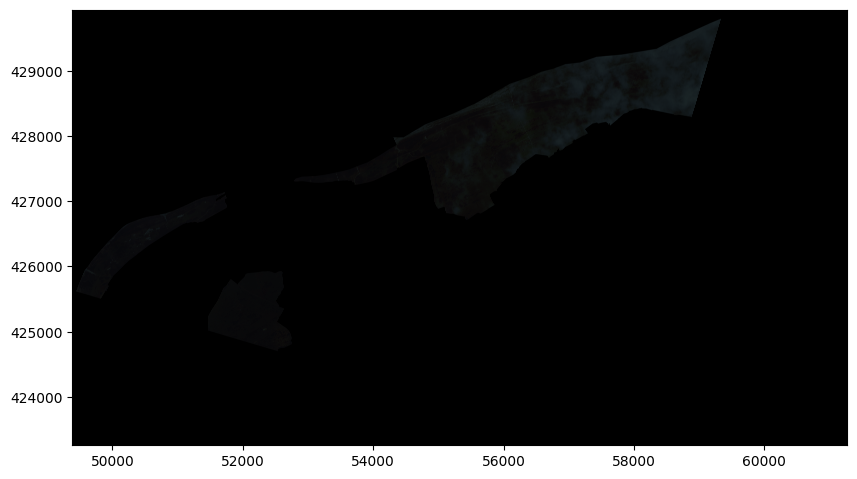

finished cropping E:/data/duinen_goeree_kwade_hoek/20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm\20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20210121_114229_SV1-02**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20210121_114229_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20220812_110959_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

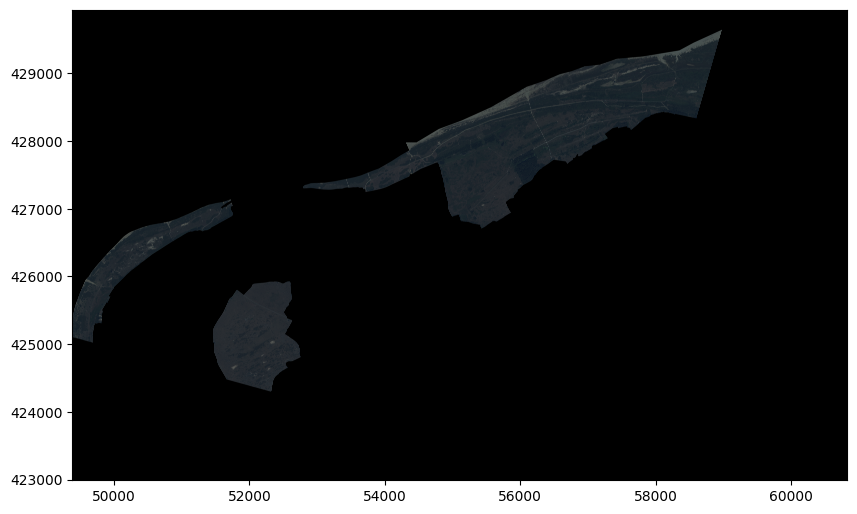

finished cropping E:/data/duinen_goeree_kwade_hoek/20220812_110959_SV1-03_SV_RD_11bit_RGBI_50cm\20220812_110959_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20220812_110959_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20220812_110959_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20220812_110959_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20220812_110959_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20220812_110959_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20220317_111822_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

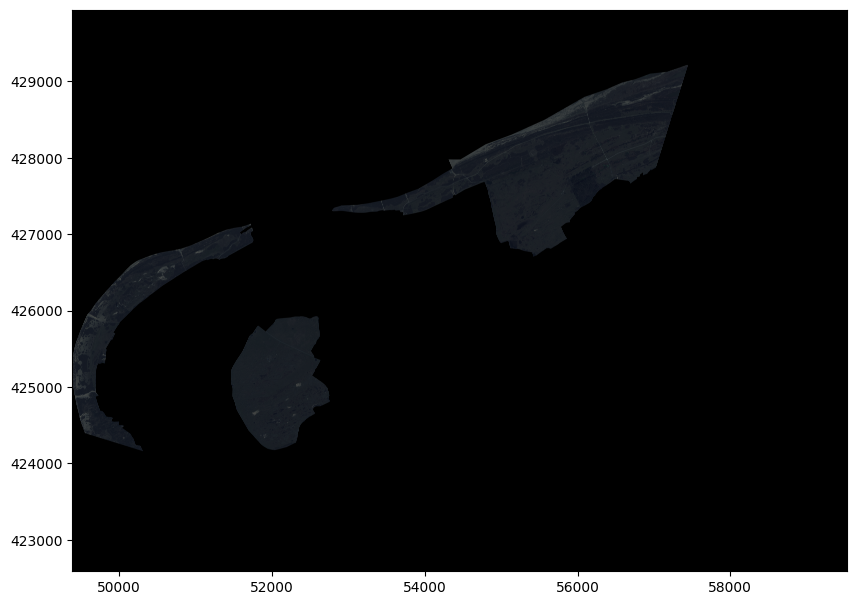

finished cropping E:/data/duinen_goeree_kwade_hoek/20220317_111822_SV1-03_SV_RD_11bit_RGBI_50cm\20220317_111822_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20220317_111822_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20220317_111822_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20220317_111822_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20220317_111822_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20220317_111822_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200501_112617_SV1-04**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

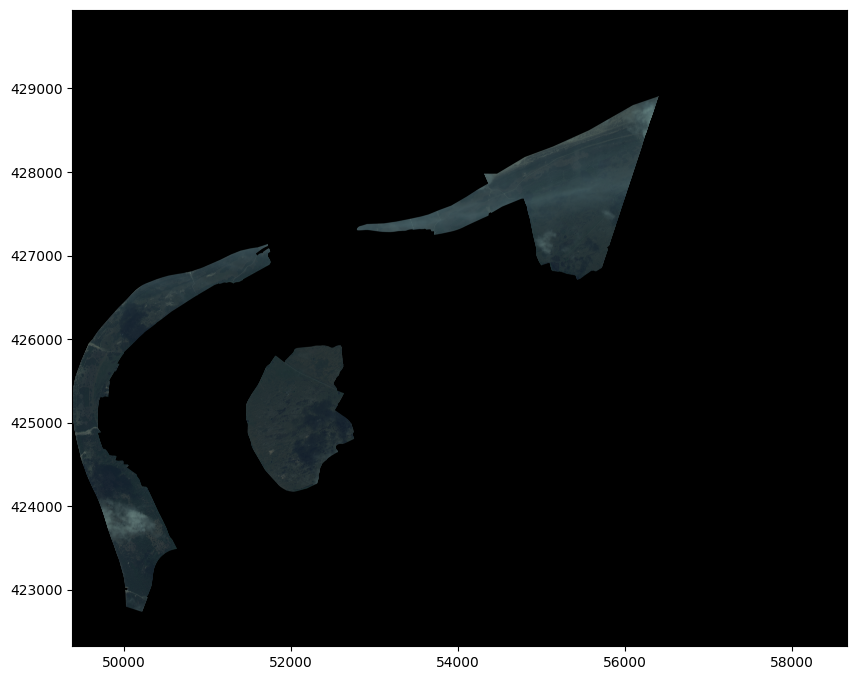

finished cropping E:/data/duinen_goeree_kwade_hoek/20200501_112617_SV1-04_SV_RD_11bit_RGBI_50cm\20200501_112617_SV1-04_SV_RD_11bit_RGBI_50cm_Brouwersdam.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20200501_112617_SV1-04_SV_RD_11bit_RGBI_50cm_Brouwersdam_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20200501_112617_SV1-04_SV_RD_11bit_RGBI_50cm_Brouwersdam_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200501_112617_SV1-04**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20200501_112617_SV1-04_SV_RD_11bit_RGBI_50cm_Brouwersdam_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20200501_112617_SV1-04_SV_RD_11bit_RGBI_50cm_Brouwersdam_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190908_111827_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif

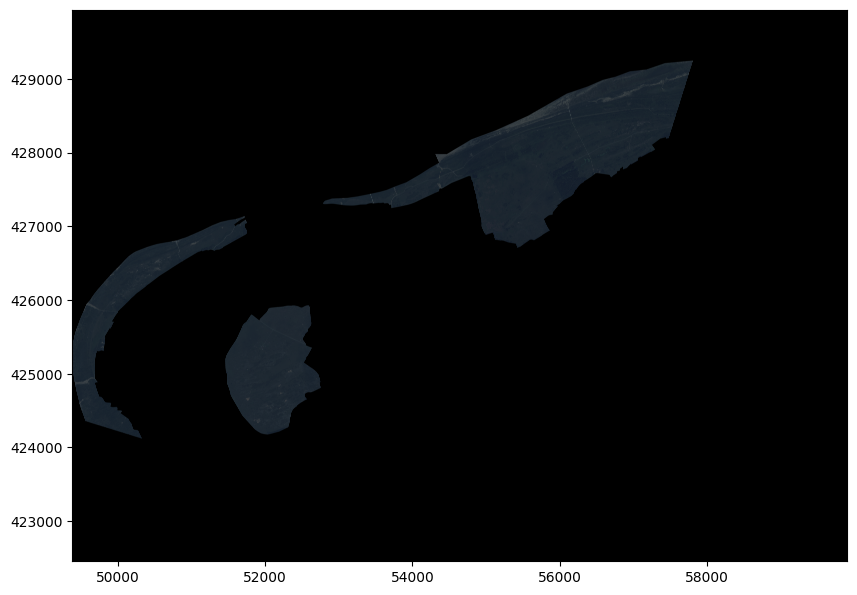

finished cropping E:/data/duinen_goeree_kwade_hoek/20190908_111827_SV1-03_SV_RD_11bit_RGBI_50cm\20190908_111827_SV1-03_50cm_RD_11bit_RGBI_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20190908_111827_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20190908_111827_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190908_111827_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20190908_111827_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20190908_111827_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200712_114824_SV1-02**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Starting download 

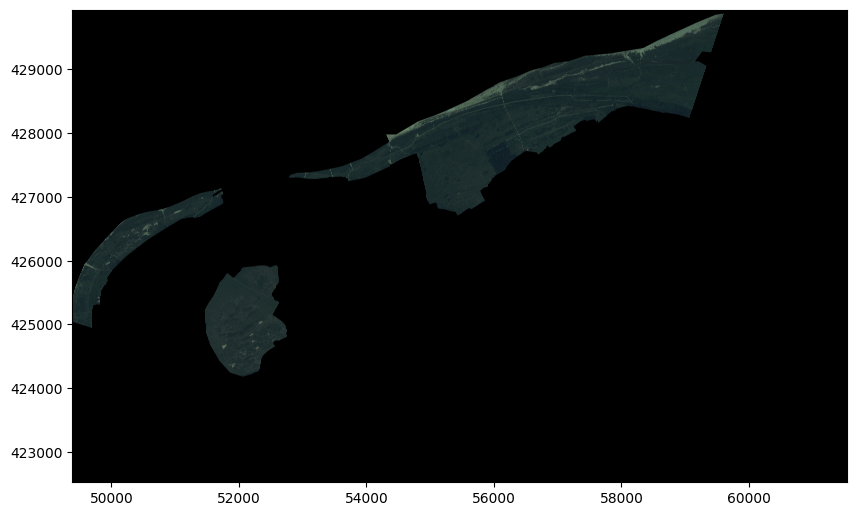

finished cropping E:/data/duinen_goeree_kwade_hoek/20200712_114824_SV1-02_SV_RD_11bit_RGBI_50cm\20200712_114824_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20200712_114824_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20200712_114824_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200712_114824_SV1-02**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20200712_114824_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20200712_114824_SV1-02_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20220922_110937_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

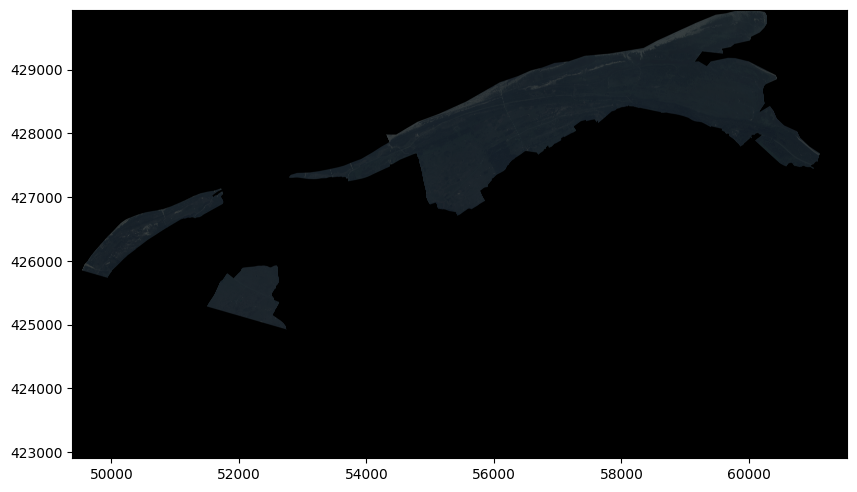

finished cropping E:/data/duinen_goeree_kwade_hoek/20220922_110937_SV1-03_SV_RD_11bit_RGBI_50cm\20220922_110937_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20220922_110937_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20220922_110937_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20220922_110937_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20220922_110937_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20220922_110937_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200922_110432_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

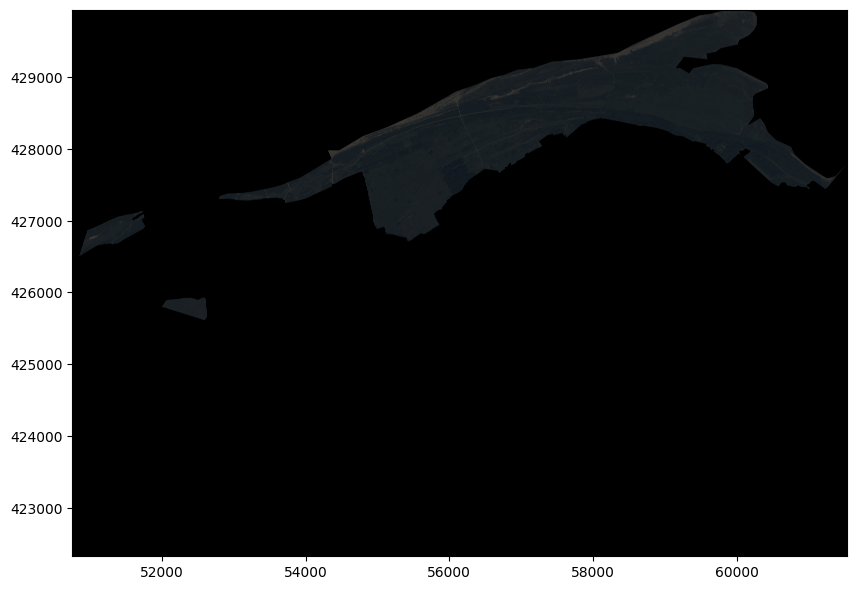

finished cropping E:/data/duinen_goeree_kwade_hoek/20200922_110432_SV1-01_SV_RD_11bit_RGBI_50cm\20200922_110432_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20200922_110432_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20200922_110432_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200922_110432_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20200922_110432_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20200922_110432_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20210929_104205_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Foun

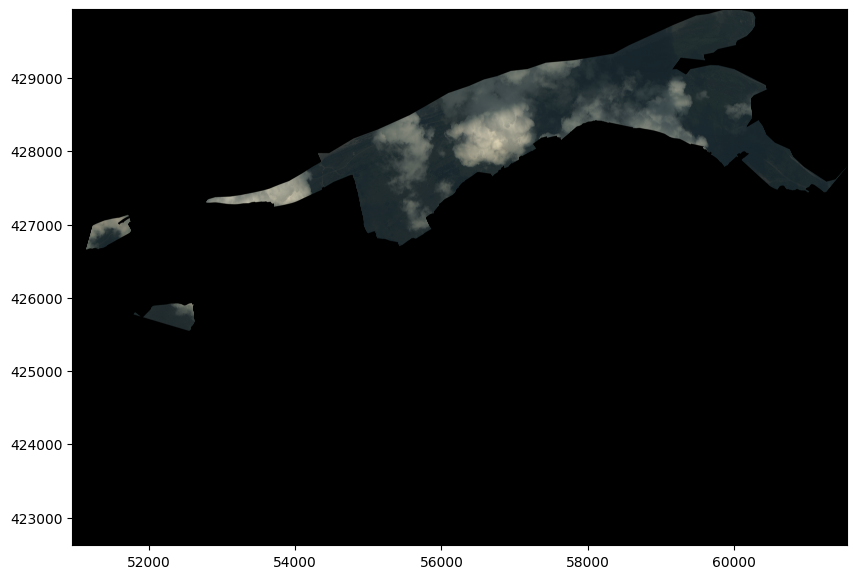

finished cropping E:/data/duinen_goeree_kwade_hoek/20210929_104205_SV1-01_SV_RD_11bit_RGBI_50cm\20210929_104205_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20210929_104205_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20210929_104205_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20210929_104205_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20210929_104205_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20210929_104205_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20210302_111339_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Foun

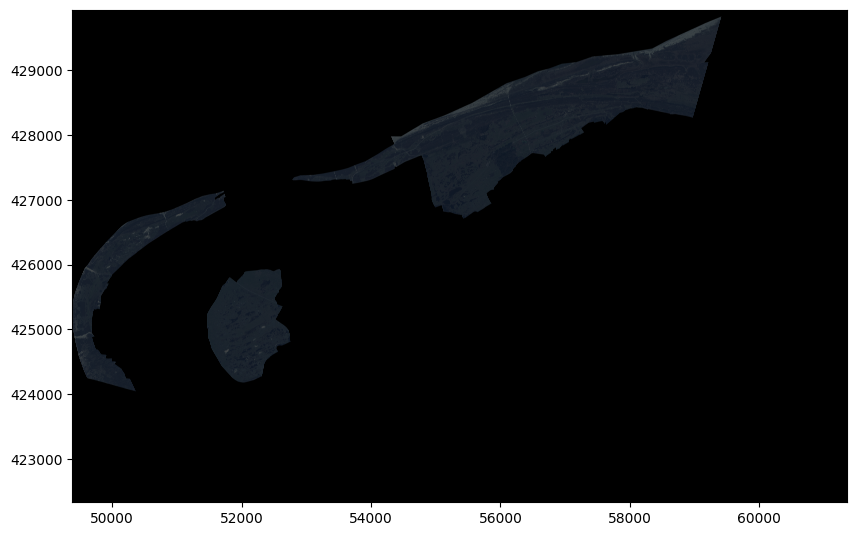

finished cropping E:/data/duinen_goeree_kwade_hoek/20210302_111339_SV1-03_SV_RD_11bit_RGBI_50cm\20210302_111339_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20210302_111339_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20210302_111339_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20210302_111339_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20210302_111339_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20210302_111339_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20210718_111853_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

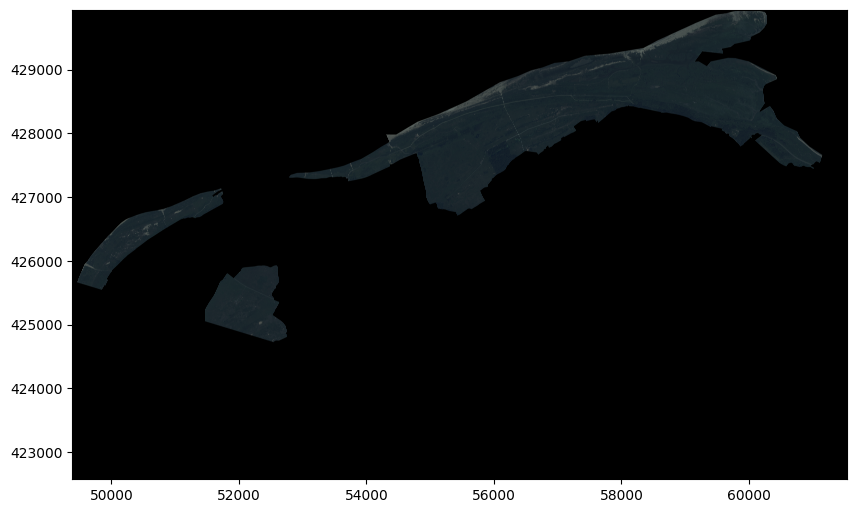

finished cropping E:/data/duinen_goeree_kwade_hoek/20210718_111853_SV1-03_SV_RD_11bit_RGBI_50cm\20210718_111853_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20210718_111853_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20210718_111853_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20210718_111853_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20210718_111853_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20210718_111853_SV1-03_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200515_111115_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

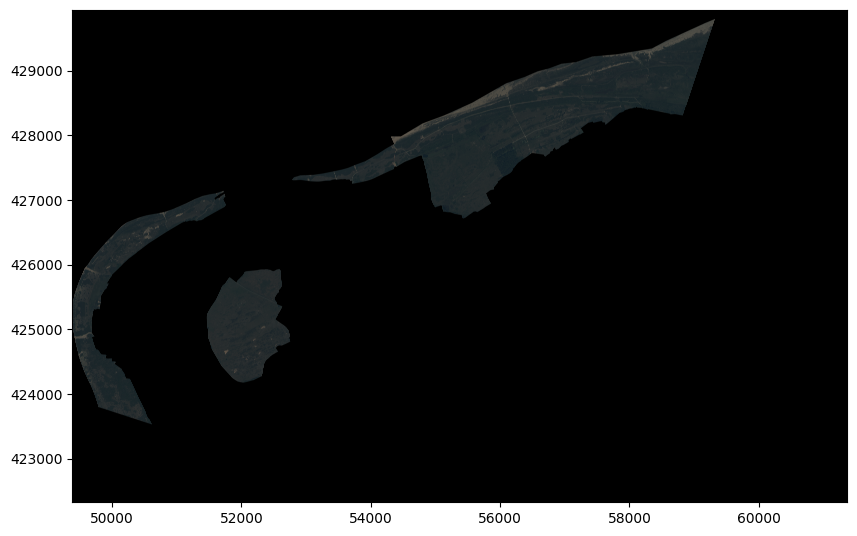

finished cropping E:/data/duinen_goeree_kwade_hoek/20200515_111115_SV1-01_SV_RD_11bit_RGBI_50cm\20200515_111115_SV1-01_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20200515_111115_SV1-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20200515_111115_SV1-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200515_111115_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20200515_111115_SV1-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20200515_111115_SV1-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190401_113457_SV1-02**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

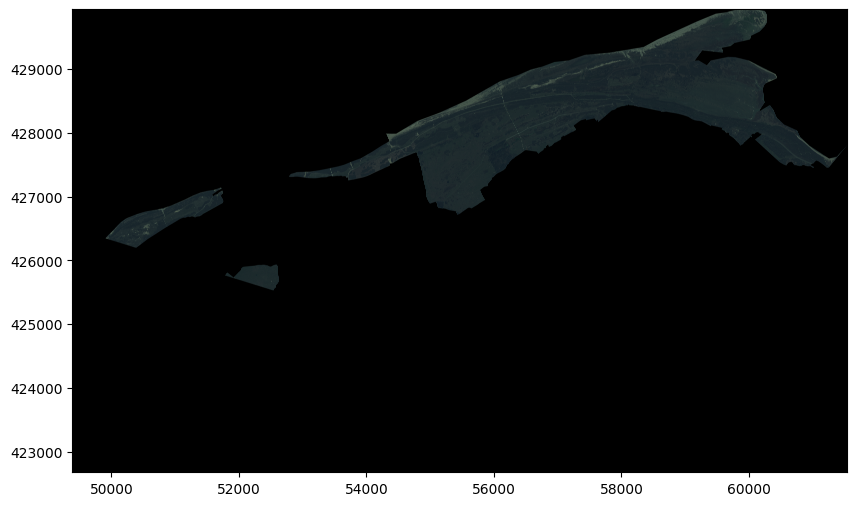

finished cropping E:/data/duinen_goeree_kwade_hoek/20190401_113457_SV1-02_SV_RD_11bit_RGBI_50cm\20190401_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20190401_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20190401_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190401_113457_SV1-02**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20190401_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20190401_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20191201_111819_SV1-04**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

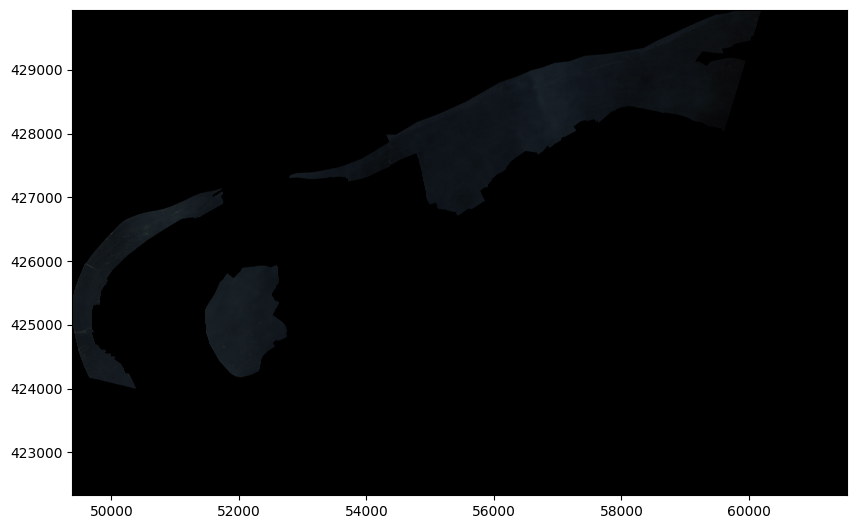

finished cropping E:/data/duinen_goeree_kwade_hoek/20191201_111819_SV1-04_SV_RD_11bit_RGBI_50cm\20191201_111819_SV1-04_50cm_RD_11bit_RGBI_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20191201_111819_SV1-04_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20191201_111819_SV1-04_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20191201_111819_SV1-04**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20191201_111819_SV1-04_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20191201_111819_SV1-04_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190726_111448_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Starting download 

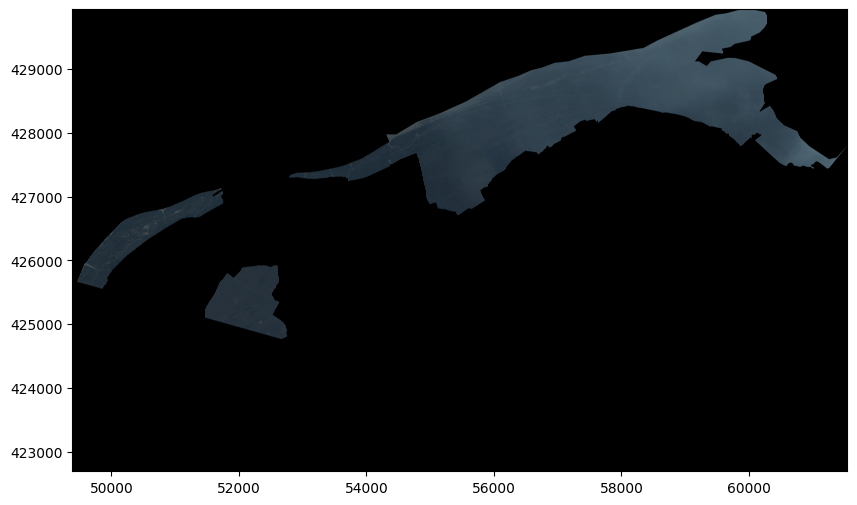

finished cropping E:/data/duinen_goeree_kwade_hoek/20190726_111448_SV1-03_SV_RD_11bit_RGBI_50cm\20190726_111448_SV1-03_50cm_RD_11bit_RGBI_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20190726_111448_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20190726_111448_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190726_111448_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20190726_111448_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20190726_111448_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190628_111104_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Starting download 

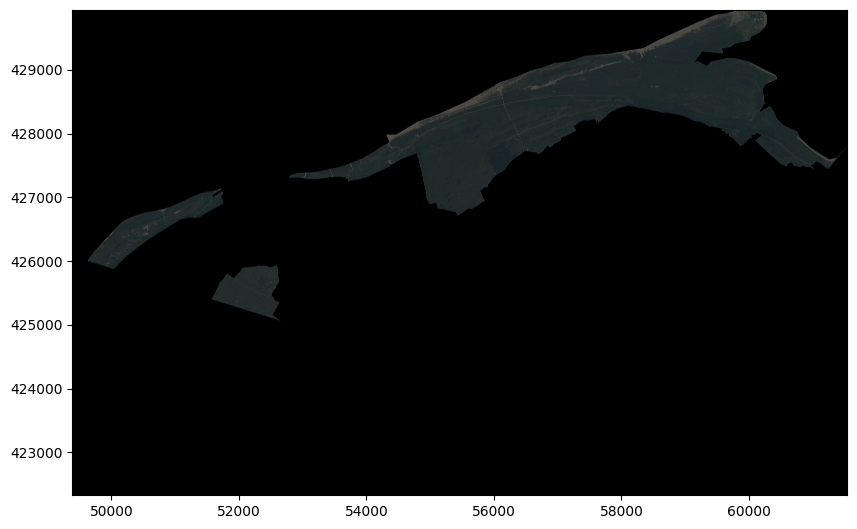

finished cropping E:/data/duinen_goeree_kwade_hoek/20190628_111104_SV1-01_SV_RD_11bit_RGBI_50cm\20190628_111104_SV1-01_50cm_RD_11bit_RGBI_Goedereede.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20190628_111104_SV1-01_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20190628_111104_SV1-01_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190628_111104_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20190628_111104_SV1-01_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20190628_111104_SV1-01_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20211108_105105_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

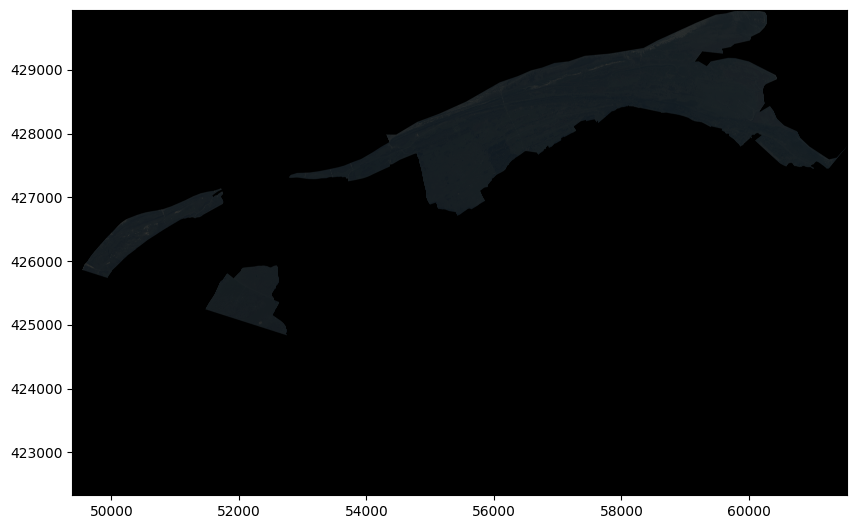

finished cropping E:/data/duinen_goeree_kwade_hoek/20211108_105105_SV1-01_SV_RD_11bit_RGBI_50cm\20211108_105105_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20211108_105105_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20211108_105105_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20211108_105105_SV1-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20211108_105105_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20211108_105105_SV1-01_SV_RD_11bit_RGBI_50cm_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190824_112131_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Foun

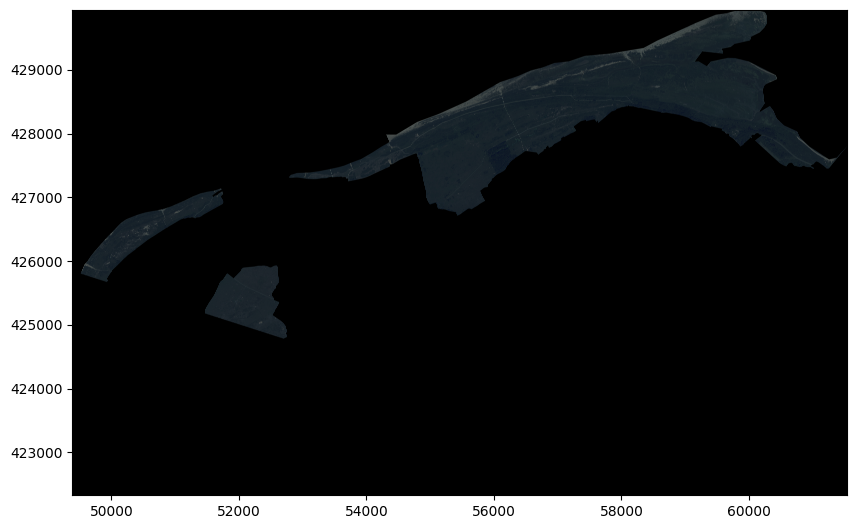

finished cropping E:/data/duinen_goeree_kwade_hoek/20190824_112131_SV1-03_SV_RD_11bit_RGBI_50cm\20190824_112131_SV1-03_50cm_RD_11bit_RGBI_Goedereede.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20190824_112131_SV1-03_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20190824_112131_SV1-03_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190824_112131_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20190824_112131_SV1-03_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20190824_112131_SV1-03_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190820_113457_SV1-02**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

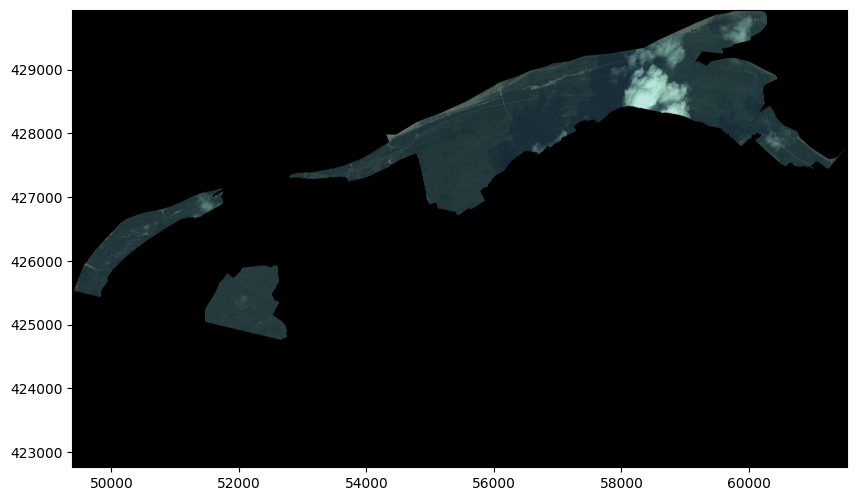

finished cropping E:/data/duinen_goeree_kwade_hoek/20190820_113457_SV1-02_SV_RD_11bit_RGBI_50cm\20190820_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20190820_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20190820_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20190820_113457_SV1-02**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20190820_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20190820_113457_SV1-02_50cm_RD_11bit_RGBI_Goedereede_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20230108_111037_SV2-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

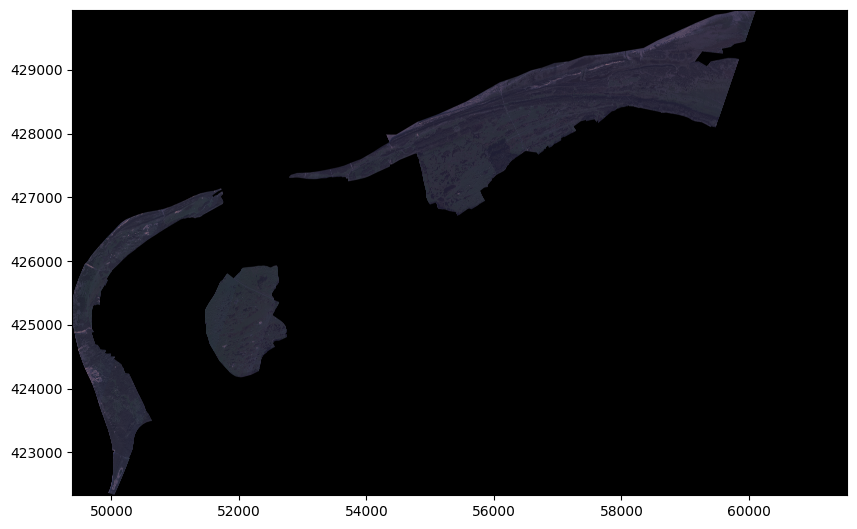

finished cropping E:/data/duinen_goeree_kwade_hoek/20230108_111037_SV2-01_SV_RD_11bit_RGBI_50cm\20230108_111037_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20230108_111037_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20230108_111037_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20230108_111037_SV2-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20230108_111037_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20230108_111037_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20191205_111945_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

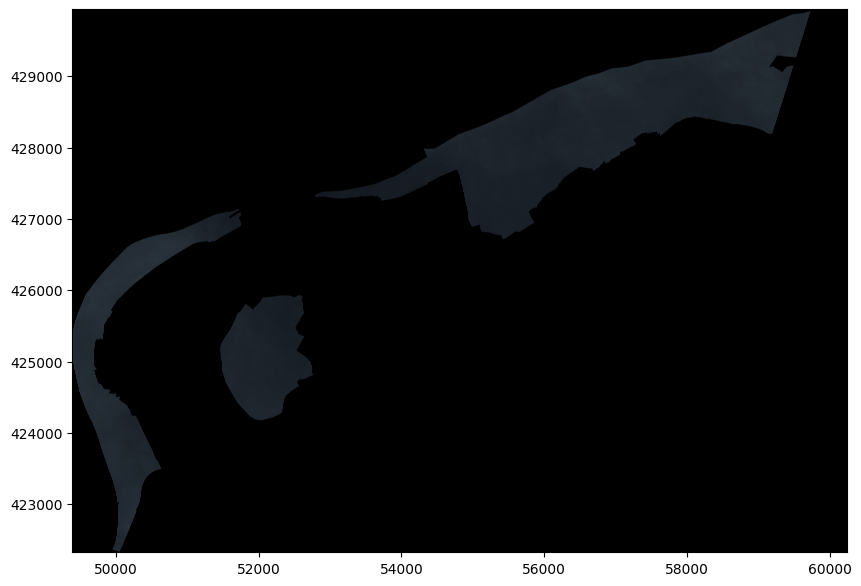

finished cropping E:/data/duinen_goeree_kwade_hoek/20191205_111945_SV1-03_SV_RD_11bit_RGBI_50cm\20191205_111945_SV1-03_50cm_RD_11bit_RGBI_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20191205_111945_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20191205_111945_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20191205_111945_SV1-03**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20191205_111945_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20191205_111945_SV1-03_50cm_RD_11bit_RGBI_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200304_112649_SV1-04**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Starting download 

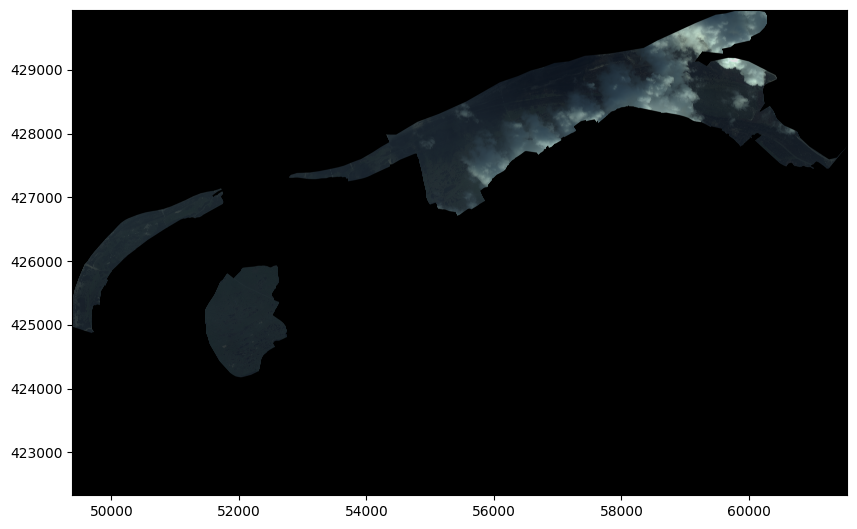

finished cropping E:/data/duinen_goeree_kwade_hoek/20200304_112649_SV1-04_SV_RD_11bit_RGBI_50cm\20200304_112649_SV1-04_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20200304_112649_SV1-04_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20200304_112649_SV1-04_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20200304_112649_SV1-04**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20200304_112649_SV1-04_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20200304_112649_SV1-04_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20220714_111636_SV2-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: []
Sta

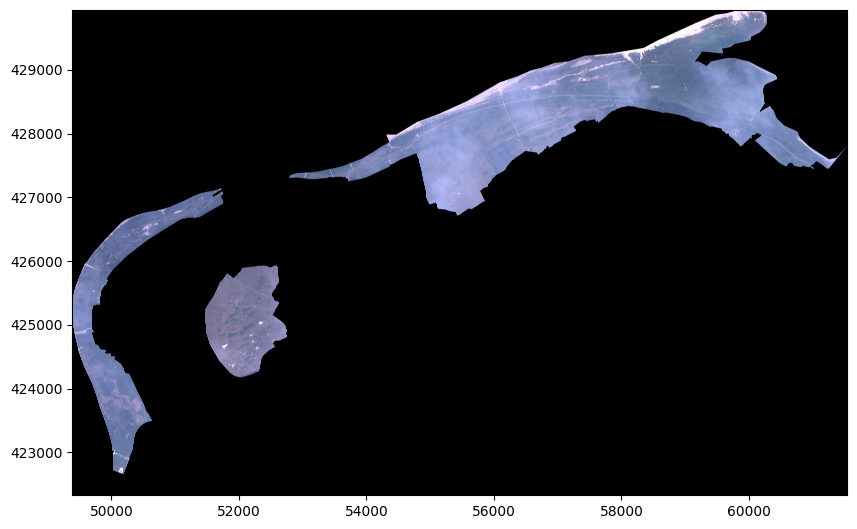

finished cropping E:/data/duinen_goeree_kwade_hoek/20220714_111636_SV2-01_SV_RD_11bit_RGBI_50cm\20220714_111636_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp.tif
Cropped file is found at: E:/data/duinen_goeree_kwade_hoek/20220714_111636_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif
Succesfully cropped .tif file
E:/data/duinen_goeree_kwade_hoek/20220714_111636_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready
Searching for: E:/data/duinen_goeree_kwade_hoek\20220714_111636_SV2-01**Duinen_Goeree_Kwade_Hoek*cropped*.tif
Found files: ['E:/data/duinen_goeree_kwade_hoek\\20220714_111636_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif']
File is already cropped
E:/data/duinen_goeree_kwade_hoek\20220714_111636_SV2-01_SV_RD_11bit_RGBI_50cm_Ouddorp_Duinen_Goeree_Kwade_Hoek_cropped.tif is Ready


In [15]:
for index,value in superview_links.iterrows():

    
    georegion.execute_link(value["link"],delete_zip_file=True)